# Compte rendu Mini projet : un exemple de système chaotique 
 Elisa Leblond 21302500

Nous avons l'équation logistique ici : 

$$ x_{i+1}=r(1-x_{i})x_{i}$$

On introduit cette fonction : 
$$ f(x) = r (1-x) x $$

le comportement de la suite est alors décrit par :
$$ x_{i+1} = f(x_i) $$


## Représentation graphique du comportement de la suite 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#paramètres du problème 

r=2.5 # r est compris en 1 et 4
x0=0.1
n=50


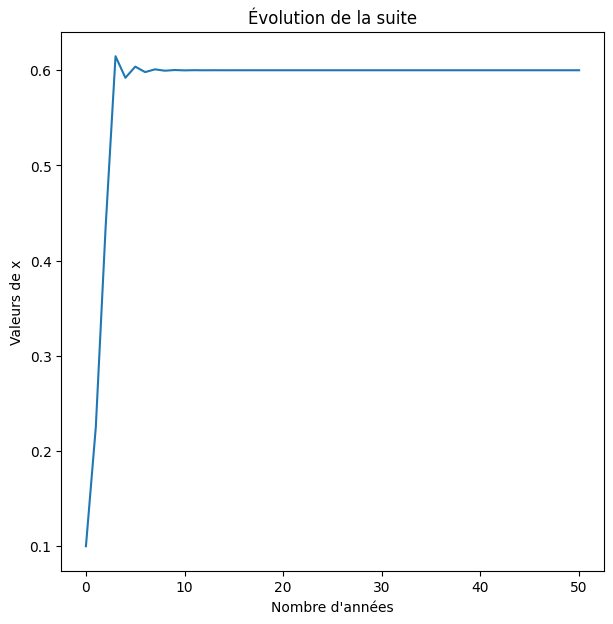

In [12]:
#définition de la suite 

x_valeurs=[x0]
x=x0

for _ in range (n):
    x=r *(1-x)* x 
    x_valeurs.append(x)
    
plt.figure(figsize=(7, 7))
plt.plot(range(n+1), x_valeurs,) #l'indice n+1 permet ici que les deux tableaux aient les mêmes dimensions 
plt.xlabel("Nombre d'années")
plt.ylabel("Valeurs de x")
plt.title("Évolution de la suite")
plt.show()

## Diagramme de bifurcation 

On souhaite étuider la limite de cette suite, et plus spécifiquement la façon dont cette limite dépend de r. On prend un nombre important de valeurs de r comrises entre 2.5 et 4. Pour chacunes de ces valeurs de r nous allons calculer les 1000 premières valeurs de la suite, en gardant seulement les 100 dernières pour ne pas être limiter par la capacité du logiciel phyton à calculer un trop grand nombre de valeurs.  

In [14]:
# Nouveaux paramètres

x0=0.00001 #on prend une nouvelle valeur de x0 
n_i=1000   #nombre d'itérnations 
n_derniers_termes=100 #les 100 dernières valeurs

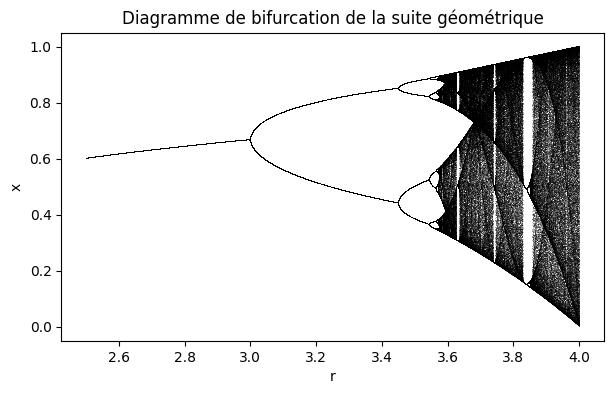

In [15]:
#intervalle des valeurs de r entre 2.5 et 4
r_valeurs=np.linspace(2.5, 4, 10000)

plt.figure(figsize=(7,4))    

#calcul des 1000 premiers termes 
for r in r_valeurs:
    x = x0
    x_valeurs = []
    for _ in range(n_i):
        x = r * x * (1 - x)
        x_valeurs.append(x)
    
    x_f = x_valeurs[-n_derniers_termes:] #on garde que les 100 dernières valeurs
    
    plt.plot([r]*n_derniers_termes, x_f, ',k',alpha=0.25) # on trace r en fonction des 100 dernières valeurs 

#Graphique      
plt.title("Diagramme de bifurcation de la suite géométrique")
plt.xlabel("r")
plt.ylabel("x")
plt.show()


La limite est bien définie. Pour des valeurs de r proches de 2.5, la suite converge vers une unique valeur stable d'environ 0.6. Quand on augmente r la suite oscille. Pour r=4 la suite devient totalement chaotique. Le diagramme de dépend pas des conditions initales, de la vleur de x0. 

## Exposant de Lybanov 

Dans cette partie on cherche une forme telle que : $$ e^{t \lambda(r)} $$

La manière de calculer cet exposant nous vient d'Alexander Lybanov, l'expression de $\lambda(r)$ est : 

$$ \lambda = \lim\limits_{n \rightarrow \infty} \frac{1}{n} \sum_{i=0}^{n-1} \log | f^{\prime} (x_i)| $$


on calcule pour chaque valeur de r uniformément distribuée entre 2.5 et 4 la valeur de cet exposant de Lybanov 

In [25]:
r_valeurs = np.linspace(2.5, 4, 1000)  # Valeurs de r entre 2.5 et 4 

r_list = []
lambda_list = []  #on crée des lsites vides de r et lambda 

#calcul de lambda 
for r in r_valeurs:
    x = x0
    l_sum = 0
    
    for _ in range(n_i): #on calcule la somme 
        x = r * x * (1 - x) 
        l_sum = l_sum + np.log(abs(r * (1 - 2 * x)))  #on a directement écrit ici l'expressionde f' 
    
    lambda_1 = l_sum / n_i  #d'après l'expression ci-dessus lambda est de la forme (sum)*(1/n)
    r_list.append(r)
    lambda_list.append(lambda_1) 

On trace maintenant r en fonction de $\lambda$

In [ ]:
plt.figure(figsize=(10, 6))

#on trace les points en noir pour (λ < 0) et en rouge pour(λ > 0)
for r, l in zip(r_list, lambda_list):
    plt.scatter(r, l, color='black' if l < 0 else 'red', s=1)

#on ajoute la ligne pour λ = 0 en bleu
plt.axhline(0, color='blue', linestyle='-', linewidth=1)

# légende et titre 
plt.title("Exposant de Lyapunov pour la suite logistique")
plt.xlabel("r")
plt.ylabel("λ(r)")
plt.show()

Ce graphique de l'exposant de Lyapunov nous permet de déterminer en indentifiant précisément le moment où le système devient chaotique 